In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image

In [3]:
# Load data

image_dir = "data/CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


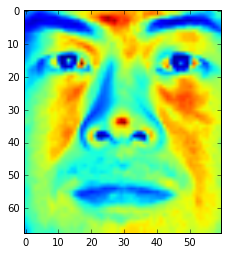

In [4]:
plt.imshow(imgs[1]) # Display first image

In [14]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

# Compute input matrix X
X_list = [np.reshape(imgs[i].getdata(), (wh)) for i in range(n)]
X = np.array(X_list).T
print(X.shape)

(4080, 38)


In [19]:
# Subtract the mean image from input matrix X
mX = X - np.mean(X, axis=0)
sigma = mX.dot(mX.T)

In [23]:
# Calculate eigendecomposition
eigval, eigvec = np.linalg.eig(sigma)

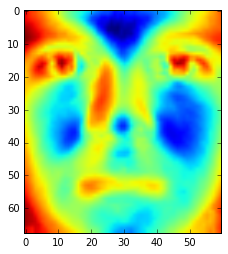

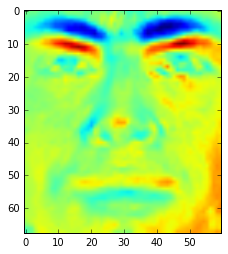

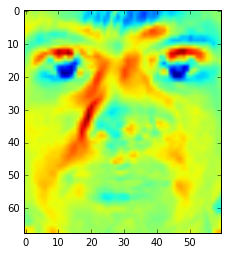

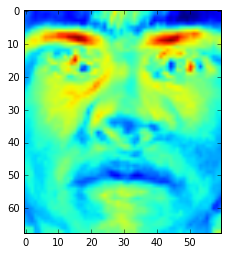

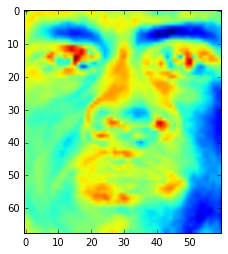

In [31]:
# Visualise top 5 eigenvectors
for eigvecno in range(0, 5):
    vec = eigvec[:, eigvecno]
    val = eigval[eigvecno]
    #print("%.3f: %s" % (val, str(vec)))
    img = np.reshape(np.real(vec), (height, width))
    plt.figure()
    plt.imshow(img)